### Loading of the needed libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Image segmentation code

In [50]:
#read the original image
original_img = cv2.imread("original_img.jpeg")
#convert the image from BGR to RGB (imread gives a BGR image) 
img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
#convert img from dim=M*N*3 to dim=K*3 where K=M*N then 1row = 1vector in RGB space
vectorized = img.reshape((-1,3))
#convert from uint8 to folat32 (k-means takes in input floats instead of unit8)
vectorized = np.float32(vectorized)
#defining the condition when the algorithm should stop interations 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#setting K: the number of colors (clusters) 
K = 3
#setting the number of times the algorithm is executed
attempts=10

In [51]:
#apply k-means to gather the pixels in clusters (1cluster = 1color)
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
#convert back to uint8
center = np.uint8(center)
#regenerate the segmented image
res = center[label.flatten()]
segmented_image = res.reshape((img.shape))

### Plot of the original and segmented images

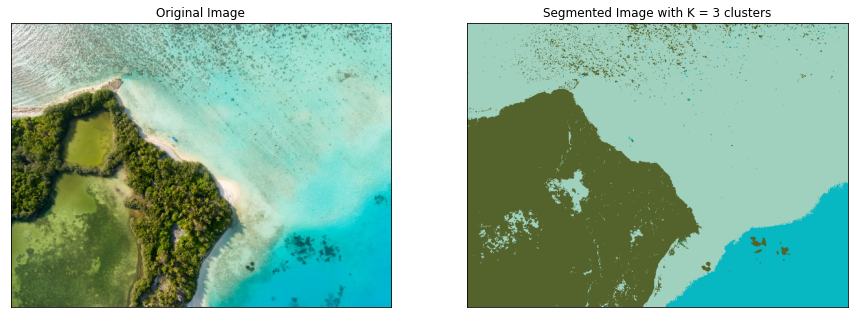

In [52]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
#plot of the original image
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#plot of the segmented image
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.title('Segmented Image with K = %i clusters' % K), plt.xticks([]), plt.yticks([])
plt.show()